<a href="https://colab.research.google.com/github/Asalbek/ML-projects/blob/main/Aviakompaniya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/aviakompaniya.zip') as myzip:
    with myzip.open('train_dataset.csv') as myfile:
     train_df = pd.read_csv(myfile)

    with myzip.open('test_dataset.csv') as myfile:
        test_df = pd.read_csv(myfile)
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [ ]:
train_df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [ ]:
train_df.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


In [ ]:
#Handling missing values by filling them median

train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)

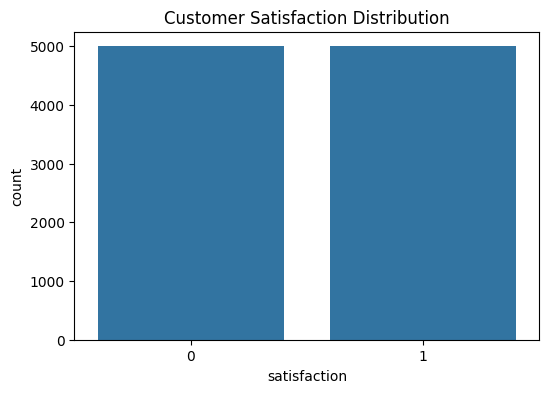

In [ ]:
# Count plot of satisfaction
plt.figure(figsize=(6,4))
sns.countplot(x='satisfaction', data=train_df)
plt.title('Customer Satisfaction Distribution')
plt.show()

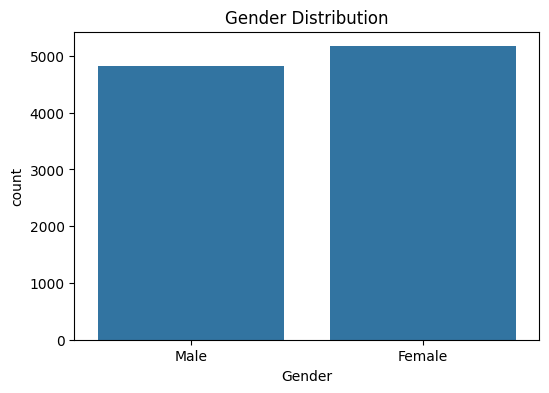

In [ ]:
# Count plot for 'Gender'
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=train_df)
plt.title('Gender Distribution')
plt.show()

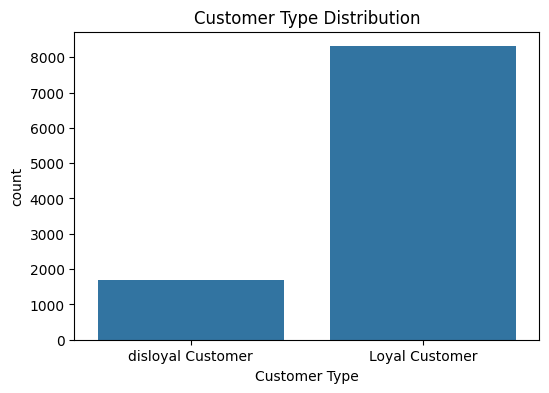

In [ ]:
# Count plot for 'Customer Type'
plt.figure(figsize=(6,4))
sns.countplot(x='Customer Type', data=train_df)
plt.title('Customer Type Distribution')
plt.show()

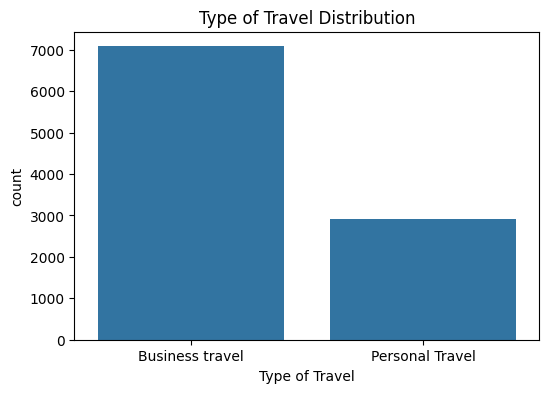

In [ ]:
# Count plot for 'Type of Travel'
plt.figure(figsize=(6,4))
sns.countplot(x='Type of Travel', data=train_df)
plt.title('Type of Travel Distribution')
plt.show()

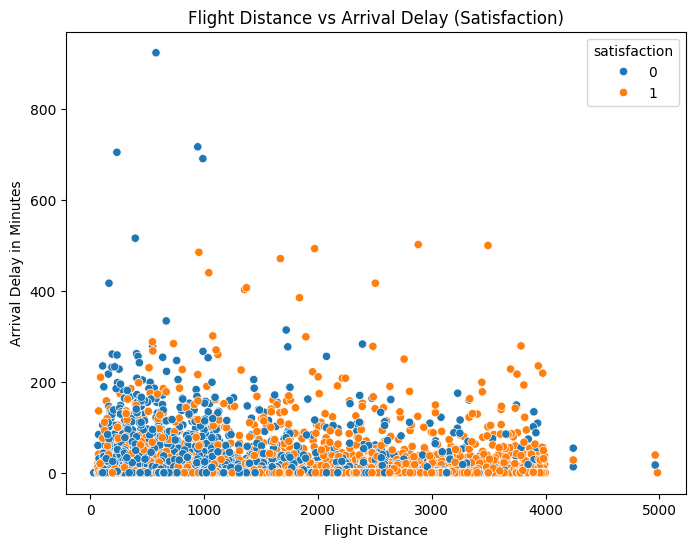

In [ ]:
# Scatter plot for 'Flight Distance' vs 'Arrival Delay in Minutes' by satisfaction
plt.figure(figsize=(8,6))
sns.scatterplot(x='Flight Distance', y='Arrival Delay in Minutes', hue='satisfaction', data=train_df)
plt.title('Flight Distance vs Arrival Delay (Satisfaction)')
plt.show()

In [ ]:
#Encoding

label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for column in categorical_columns:
    train_df[column] = label_encoder.fit_transform(train_df[column])


In [ ]:
#features and target splitting

X=train_df.drop(columns=['id','satisfaction'])
y=train_df['satisfaction']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Train and Test Data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Random Forest Classifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#model

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.96      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

0.9505
[[964  38]
 [ 61 937]]
0.9505
